In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Завантаження датасету Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перевірка формату даних
print(f'Тренувальний набір: {x_train.shape}, Тестовий набір: {x_test.shape}')


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Тренувальний набір: (60000, 28, 28), Тестовий набір: (10000, 28, 28)


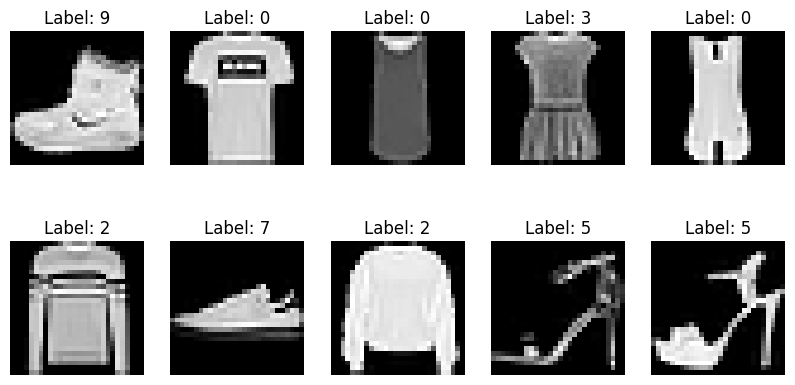

In [2]:
# Виведення 10 зображень з навчального набору
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Підготовка даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Побудова архітектури моделі
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Перетворення 2D зображення в 1D вектор
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Визначення колбеків
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)


In [5]:
# Виведення архітектури моделі
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Збереження моделі
model.save('/content/drive/My Drive/fashion_mnist_model.h5')


Mounted at /content/drive


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7655 - loss: 0.6759 - val_accuracy: 0.8589 - val_loss: 0.4019 - learning_rate: 0.0010
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8608 - loss: 0.3838 - val_accuracy: 0.8579 - val_loss: 0.3946 - learning_rate: 0.0010
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8755 - loss: 0.3385 - val_accuracy: 0.8750 - val_loss: 0.3448 - learning_rate: 0.0010
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8843 - loss: 0.3175 - val_accuracy: 0.8665 - val_loss: 0.3654 - learning_rate: 0.0010
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8913 - loss: 0.3001 - val_accuracy: 0.8781 - val_loss: 0.3393 - learning_rate: 0.0010
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8946 - loss: 0.2838 - val_accuracy: 0.8731 - val_loss: 0.3551 - learning_rate: 0.0010
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9002 

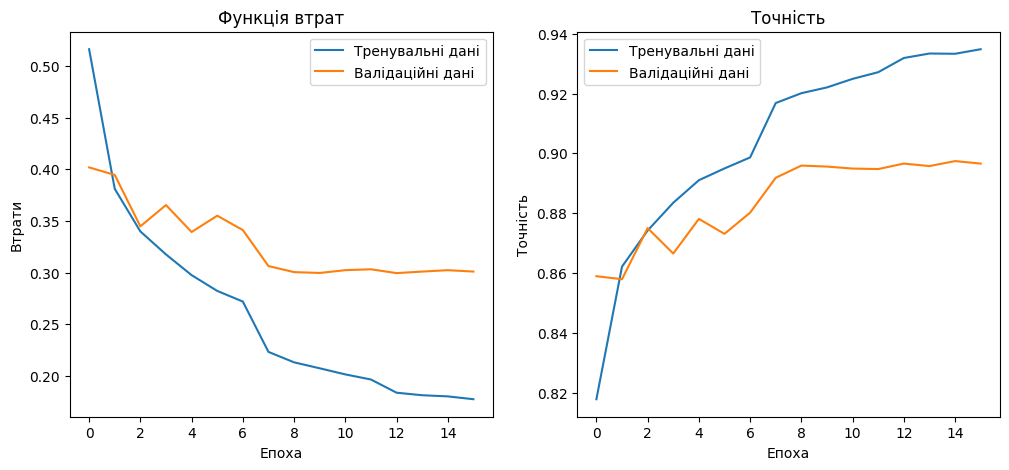

In [7]:
# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr], batch_size=32)

# Графіки функції втрат і точності
plt.figure(figsize=(12, 5))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні дані')
plt.plot(history.history['val_loss'], label='Валідаційні дані')
plt.title('Функція втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальні дані')
plt.plot(history.history['val_accuracy'], label='Валідаційні дані')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()


In [8]:
from sklearn.metrics import classification_report

# Оцінка моделі на тестовому наборі
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Класифікаційний звіт
print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.88      0.91      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.75      0.70      0.73      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



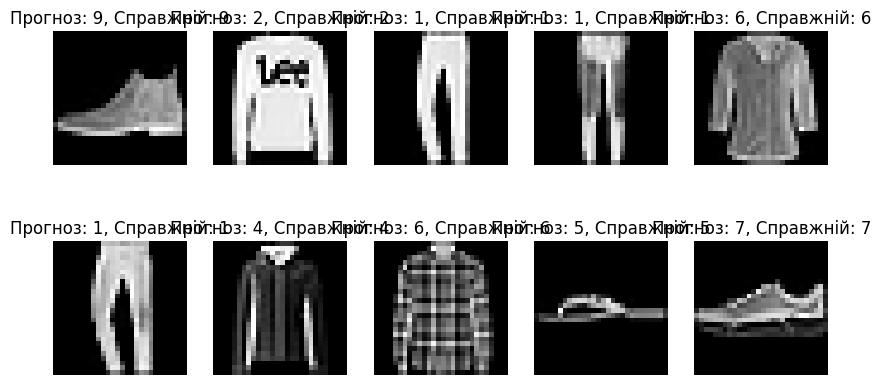

In [9]:
# Виведення кількох результатів
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Прогноз: {y_pred_classes[i]}, Справжній: {y_true[i]}')
    plt.axis('off')
plt.show()


Завдання 2

In [14]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.5 MB/s eta 0:00:00


In [15]:
from tensorflow import keras
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Створення класу для гіперпараметрів
class FashionMNISTHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28)))

        # Налаштування кількості нейронів у прихованих шарах
        for i in range(hp.Int('num_layers', 1, 3)):
            model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                            activation='relu'))

        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

# Налаштування Keras Tuner
hypermodel = FashionMNISTHyperModel()
tuner = RandomSearch(hypermodel, objective='val_accuracy', max_trials=10, executions_per_trial=1,
                     directory='fashion_mnist_tuning', project_name='fashion_mnist')

# Виконання підбору гіперпараметрів
tuner.search(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Trial 10 Complete [00h 00m 16s]
val_accuracy: 0.8665000200271606

Best val_accuracy So Far: 0.8799166679382324
Total elapsed time: 00h 03m 49s


In [16]:
# Виведення кращих параметрів
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Кращі параметри: {best_hyperparameters.values}')

# Оцінка кращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f'Тестова точність: {accuracy}, Втрати: {loss}')


Кращі параметри: {'num_layers': 2, 'units_0': 160, 'units_1': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8692 - loss: 0.3523
Тестова точність: 0.868399977684021, Втрати: 0.3586999773979187


Висновок: У ході лабораторної роботи була розроблена нейронна мережа для класифікації зображень з датасету Fashion MNIST.Загалом, лабораторна робота підтвердила ефективність нейронних мереж у задачах комп'ютерного зору, а також показала важливість налаштування гіперпараметрів для досягнення оптимальних результатів.

